<a href="https://colab.research.google.com/github/deveshnew12/Machine-learning-model-prediction/blob/main/tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=pd.read_csv("car_evaluation.csv")

In [ ]:
df.head()

,vhigh,vhigh.1,2,2.1,small,low,unacc
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc


In [ ]:
df.describe()

,vhigh,vhigh.1,2,2.1,small,low,unacc
count,1727,1727,1727,1727,1727,1727,1727
unique,4,4,4,3,3,3,4
top,high,high,3,4,med,med,unacc
freq,432,432,432,576,576,576,1209


In [ ]:
df.rename(columns={'vhigh.1':'man_cost','vhigh':'buy_price','2':'No_doors','2.1':'no_person','small':'boot_space',"low":'safty','unacc':'decision'},inplace=True)

In [ ]:
df.head()

,buy_price,man_cost,No_doors,no_person,boot_space,safty,decision
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc


In [ ]:
df.isnull().sum()

buy_price     0
man_cost      0
No_doors      0
no_person     0
boot_space    0
safty         0
decision      0
dtype: int64

In [ ]:
df.buy_price.unique()


array(['vhigh', 'high', 'med', 'low'], dtype=object)

In [ ]:
df['buy_price']=df['buy_price'].map({'vhigh':3,'high':2,'med':1,'low':0})

In [ ]:
df.No_doors.unique()

array(['2', '3', '4', '5more'], dtype=object)

In [ ]:
df['No_doors']=df['No_doors'].map({'2':2,'3':3,'4':4,'5more':5})

In [ ]:
df['No_doors'].unique()

array([2, 3, 4, 5])

In [ ]:
df['no_person'].unique()


array(['2', '4', 'more'], dtype=object)

In [ ]:
df['no_person']=df['no_person'].map({'2':2,'4':4,'more':5})

In [ ]:
df['no_person'].unique()

array([2, 4, 5])

In [ ]:
df.head()

,buy_price,man_cost,No_doors,no_person,boot_space,safty,decision
0,3,vhigh,2,2,small,med,unacc
1,3,vhigh,2,2,small,high,unacc
2,3,vhigh,2,2,med,low,unacc
3,3,vhigh,2,2,med,med,unacc
4,3,vhigh,2,2,med,high,unacc


In [ ]:
df.decision.unique()

array(['unacc', 'acc', 'vgood', 'good'], dtype=object)

In [ ]:
df['man_cost'].unique()

array(['vhigh', 'high', 'med', 'low'], dtype=object)

In [ ]:
df['man_cost']=df['man_cost'].map({'vhigh':3,'high':2,'med':1,'low':0})

In [ ]:
df['boot_space'].unique()

array(['small', 'med', 'big'], dtype=object)

In [ ]:
df['boot_space']=df['boot_space'].map({'big':2,'med':1,'small':0})

In [ ]:
df['safty'].unique()

array(['med', 'high', 'low'], dtype=object)

In [ ]:
df['safty']=df['safty'].map({'high':2,'med':1,'low':0})

In [ ]:
df.head()

,buy_price,man_cost,No_doors,no_person,boot_space,safty,decision
0,3,3,2,2,0,1,unacc
1,3,3,2,2,0,2,unacc
2,3,3,2,2,1,0,unacc
3,3,3,2,2,1,1,unacc
4,3,3,2,2,1,2,unacc


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1727 entries, 0 to 1726
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   buy_price   1727 non-null   int64 
 1   man_cost    1727 non-null   int64 
 2   No_doors    1727 non-null   int64 
 3   no_person   1727 non-null   int64 
 4   boot_space  1727 non-null   int64 
 5   safty       1727 non-null   int64 
 6   decision    1727 non-null   object
dtypes: int64(6), object(1)
memory usage: 94.6+ KB


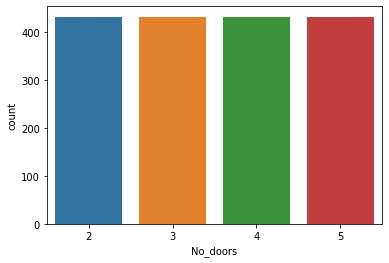

In [ ]:
sns.countplot(data=df,x='No_doors')

In [ ]:
df['No_doors'].value_counts()

3    432
4    432
5    432
2    431
Name: No_doors, dtype: int64

In [ ]:
df.groupby(['No_doors']).buy_price.count()

No_doors
2    431
3    432
4    432
5    432
Name: buy_price, dtype: int64

In [ ]:
Y=df['decision']
Y

0       unacc
1       unacc
2       unacc
3       unacc
4       unacc
        ...  
1722     good
1723    vgood
1724    unacc
1725     good
1726    vgood
Name: decision, Length: 1727, dtype: object

In [ ]:
df.columns

Index(['buy_price', 'man_cost', 'No_doors', 'no_person', 'boot_space', 'safty',
       'decision'],
      dtype='object')

In [ ]:
X=df[['buy_price', 'man_cost', 'No_doors', 'no_person', 'boot_space', 'safty']]
X.head(5)

,buy_price,man_cost,No_doors,no_person,boot_space,safty
0,3,3,2,2,0,1
1,3,3,2,2,0,2
2,3,3,2,2,1,0
3,3,3,2,2,1,1
4,3,3,2,2,1,2


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

In [ ]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2)

In [ ]:
model=DecisionTreeClassifier()

In [ ]:
res=model.fit(X_train,Y_train)

In [ ]:
predict=res.predict(X_test)
predict

array(['unacc', 'unacc', 'acc', 'unacc', 'unacc', 'vgood', 'unacc',
       'unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'unacc',
       'acc', 'unacc', 'unacc', 'acc', 'unacc', 'unacc', 'acc', 'unacc',
       'good', 'unacc', 'unacc', 'vgood', 'unacc', 'unacc', 'unacc',
       'unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'acc', 'unacc',
       'unacc', 'vgood', 'acc', 'unacc', 'unacc', 'unacc', 'unacc',
       'unacc', 'unacc', 'unacc', 'unacc', 'acc', 'unacc', 'acc', 'unacc',
       'acc', 'unacc', 'acc', 'unacc', 'unacc', 'unacc', 'acc', 'acc',
       'acc', 'unacc', 'acc', 'unacc', 'unacc', 'good', 'unacc', 'unacc',
       'unacc', 'unacc', 'acc', 'acc', 'acc', 'unacc', 'unacc', 'acc',
       'acc', 'acc', 'unacc', 'unacc', 'unacc', 'acc', 'unacc', 'acc',
       'unacc', 'unacc', 'unacc', 'unacc', 'acc', 'unacc', 'unacc',
       'unacc', 'good', 'unacc', 'unacc', 'unacc', 'unacc', 'unacc',
       'unacc', 'unacc', 'unacc', 'acc', 'unacc', 'vgood', 'unacc', 'acc',
       'un

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
accuracy_score(Y_test,predict)

0.9682080924855492